<a href="https://colab.research.google.com/github/shekhar-khadka/Face-Rcognition/blob/main/training_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train='/content/drive/My Drive/face_recognition/data/train/'
test='/content/drive/My Drive/face_recognition/data/test/'
validation='/content/drive/My Drive/face_recognition/data/validation/'

In [ ]:
!pip install livelossplot
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Activation, Flatten,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from tensorflow.keras.models import model_from_json,load_model
from tensorflow.keras import Model as m
from tensorflow.keras.optimizers import Adam   
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF


In [ ]:
datagen_train=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(train,
                              target_size=(180,180),
                             batch_size=10,
                            class_mode='categorical',
                            shuffle=True  )
datagen_validation=ImageDataGenerator(rescale=1./255)
validation_generator=datagen_validation.flow_from_directory(validation,
                              target_size=(180,180),
                             batch_size=2,
                            class_mode='categorical',
                            shuffle=True  )
datagen_test=ImageDataGenerator(1./255)
test_generator=datagen_test.flow_from_directory(test,target_size=(180,180),batch_size=1)

Found 1276 images belonging to 11 classes.
Found 215 images belonging to 11 classes.
Found 175 images belonging to 11 classes.


In [ ]:
train_generator.class_indices

{'Elon_musk': 0,
 'Rohit': 1,
 'Ronaldo': 2,
 'deepika': 3,
 'jack ma': 4,
 'jos_buttler': 5,
 'jose': 6,
 'mandela': 7,
 'messi': 8,
 'samragyee': 9,
 'swastima_khadka': 10}

In [ ]:
test_generator.class_indices

{'Elon_musk': 0,
 'Rohit': 1,
 'Ronaldo': 2,
 'deepika': 3,
 'jack ma': 4,
 'jos_buttler': 5,
 'jose': 6,
 'mandela': 7,
 'messi': 8,
 'samragyee': 9,
 'swastima_khadka': 10}

In [ ]:
model=Sequential()

In [ ]:
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(180,180,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(11, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 90, 128)      

In [ ]:
#compiling
model.compile(optimizer=Adam(0.001),loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(train_generator,epochs=20,validation_data=validation_generator)


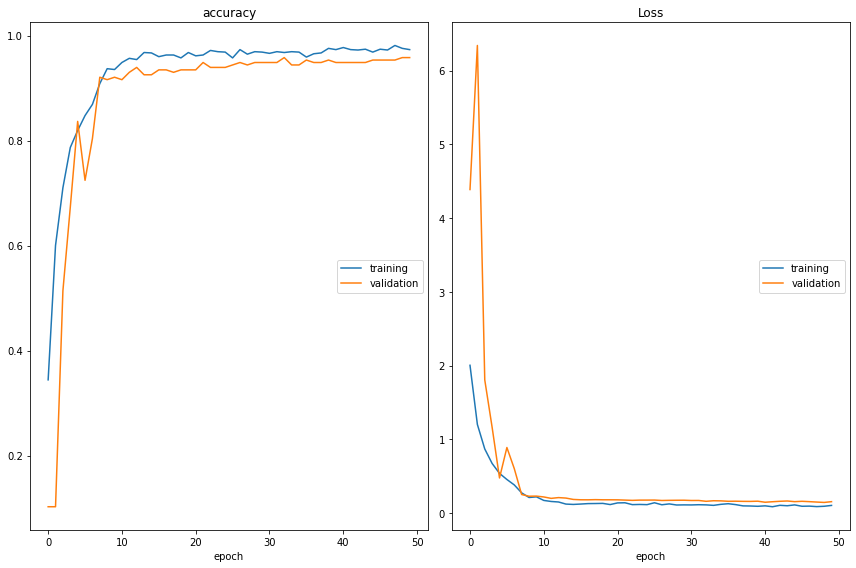

accuracy
	training         	 (min:    0.344, max:    0.981, cur:    0.973)
	validation       	 (min:    0.103, max:    0.958, cur:    0.958)
Loss
	training         	 (min:    0.088, max:    2.005, cur:    0.106)
	validation       	 (min:    0.147, max:    6.340, cur:    0.157)

Epoch 00050: saving model to models.h5
127/127 [==============================] - 9s 70ms/step - loss: 0.1062 - accuracy: 0.9731 - val_loss: 0.1570 - val_accuracy: 0.9579


In [ ]:
epochs = 50
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("models.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

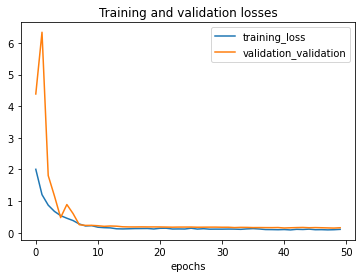

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_loss','validation_validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')
plt.show()

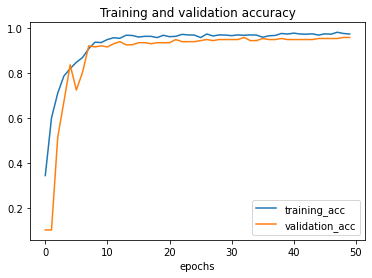

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['training_acc','validation_acc'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.show()

Ronaldo
correct class for image Ronaldo
predicted class is Ronaldo


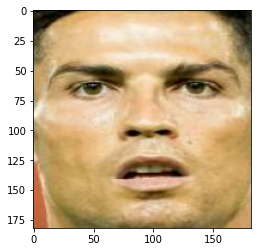

correct class for image Ronaldo
predicted class is Ronaldo


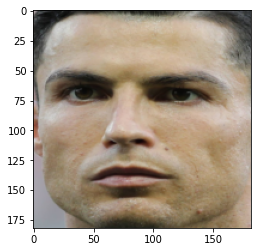

correct class for image Ronaldo
predicted class is Ronaldo


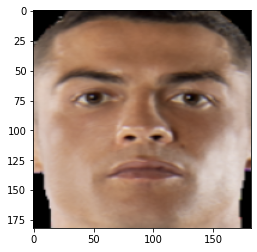

correct class for image Ronaldo
predicted class is Ronaldo


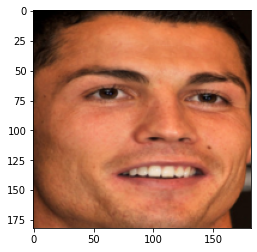

jack ma
correct class for image jack ma
predicted class is jack ma


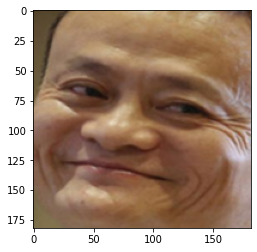

correct class for image jack ma
predicted class is jack ma


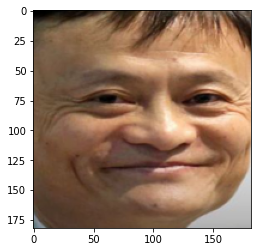

correct class for image jack ma
predicted class is jack ma


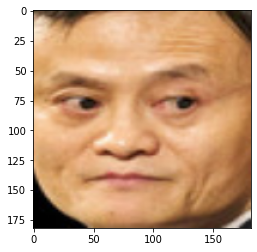

correct class for image jack ma
predicted class is jack ma


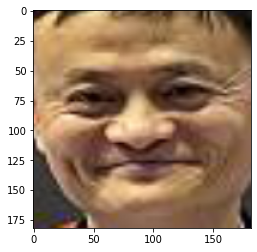

samragyee
correct class for image samragyee
predicted class is samragyee


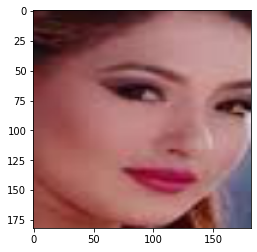

correct class for image samragyee
predicted class is samragyee


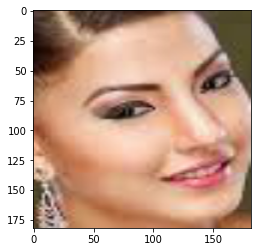

correct class for image samragyee
predicted class is samragyee


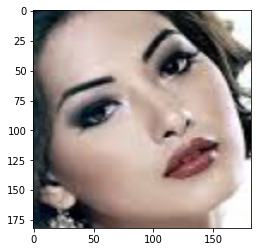

correct class for image samragyee
predicted class is samragyee


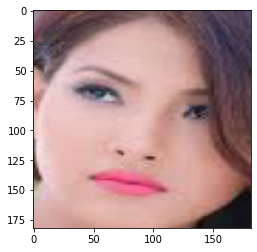

jose
correct class for image jose
predicted class is jose


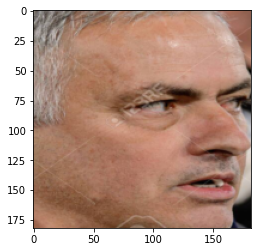

correct class for image jose
predicted class is jose


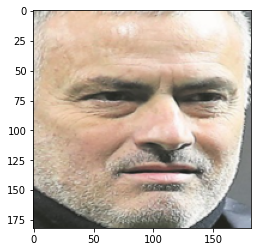

correct class for image jose
predicted class is jose


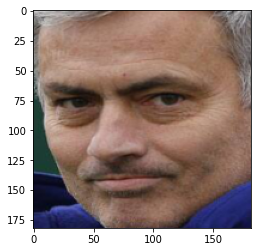

correct class for image jose
predicted class is jose


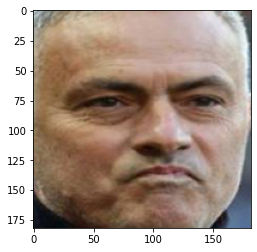

jos_buttler
correct class for image jos_buttler
predicted class is jos_buttler


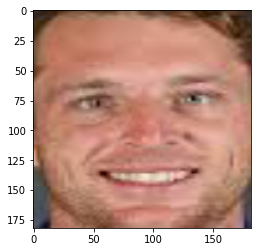

correct class for image jos_buttler
predicted class is jos_buttler


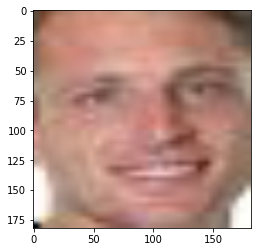

correct class for image jos_buttler
predicted class is jos_buttler


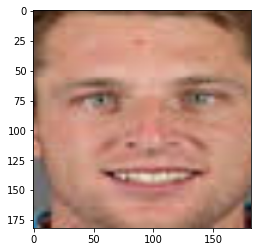

correct class for image jos_buttler
predicted class is jos_buttler


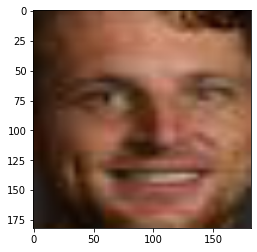

Rohit
correct class for image Rohit
predicted class is Rohit


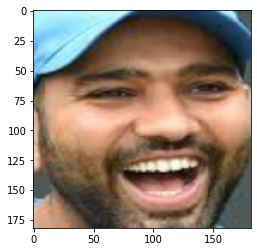

correct class for image Rohit
predicted class is Rohit


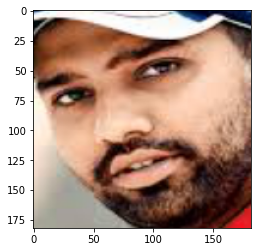

correct class for image Rohit
predicted class is Rohit


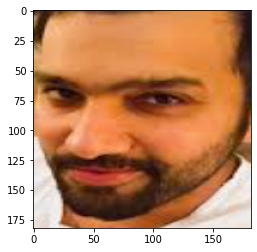

correct class for image Rohit
predicted class is Rohit


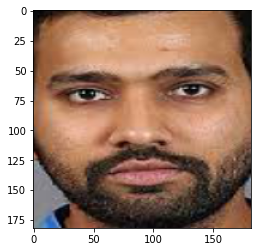

messi
correct class for image messi
predicted class is messi


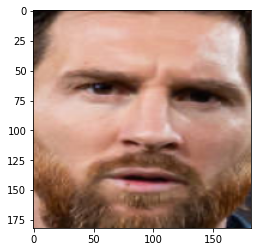

correct class for image messi
predicted class is messi


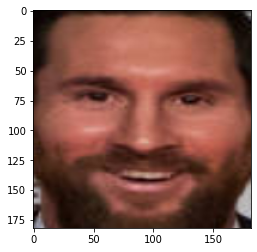

correct class for image messi
predicted class is messi


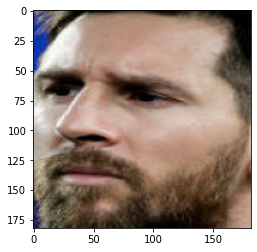

correct class for image messi
predicted class is messi


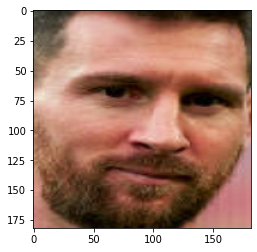

Elon_musk
correct class for image Elon_musk
predicted class is Elon_musk


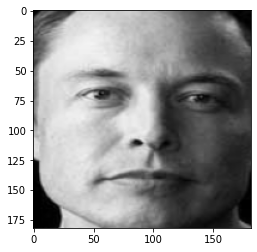

correct class for image Elon_musk
predicted class is Elon_musk


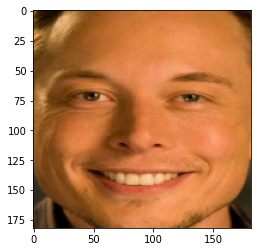

correct class for image Elon_musk
predicted class is Elon_musk


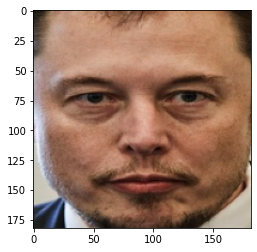

correct class for image Elon_musk
predicted class is Elon_musk


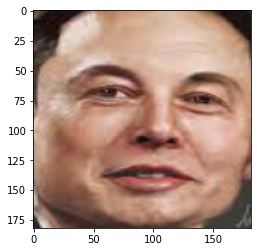

swastima_khadka
correct class for image swastima_khadka
predicted class is swastima_khadka


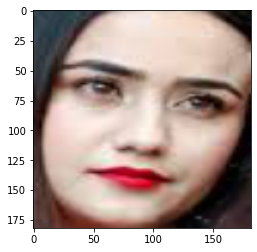

correct class for image swastima_khadka
predicted class is swastima_khadka


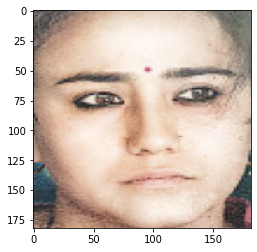

correct class for image swastima_khadka
predicted class is swastima_khadka


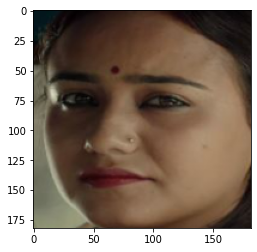

correct class for image swastima_khadka
predicted class is swastima_khadka


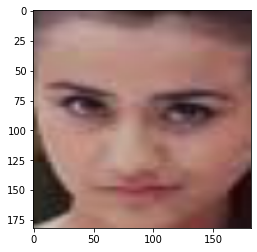

mandela
correct class for image mandela
predicted class is mandela


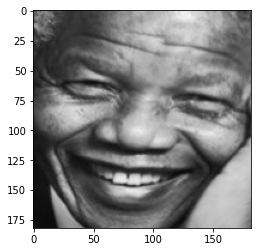

correct class for image mandela
predicted class is mandela


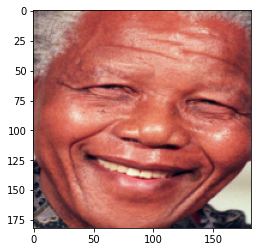

correct class for image mandela
predicted class is mandela


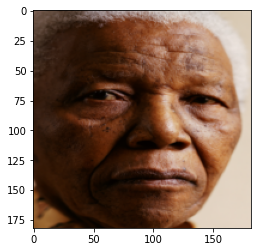

correct class for image mandela
predicted class is mandela


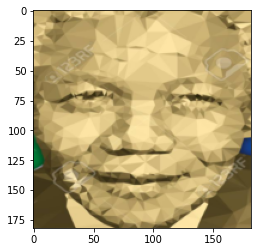

deepika
correct class for image deepika
predicted class is deepika


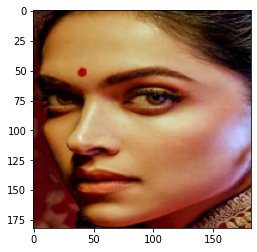

correct class for image deepika
predicted class is swastima_khadka


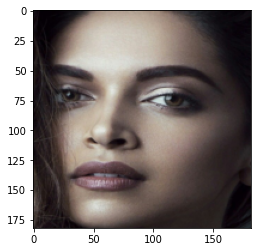

correct class for image deepika
predicted class is deepika


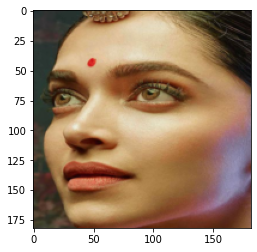

correct class for image deepika
predicted class is deepika


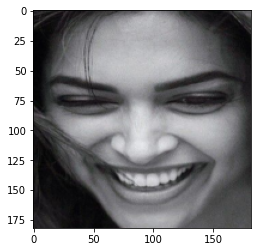

In [ ]:
for i in os.listdir(test):
  print(i)
  for j in os.listdir(os.path.join(test,i))[:4]:
    
    img=load_img(os.path.join(test,i,j))
    x=np.expand_dims(img.resize((180,180)),axis=0)
    y=model.predict(x/255.)
    y_class=y.argmax()
    plt.imshow(img)
    print('correct class for image {}'.format(i))
    print('predicted class is {}'.format(list(train_generator.class_indices.keys())[y_class]))
    plt.show()


In [ ]:
y_pred=[]
y_act=[]
test_generator.reset()
for i in range (len(test_generator.filenames)):
    x,y=test_generator.next()
    
    y_pred.append(model.predict(x/255.).argmax())
    y_act.append(y.argmax())  


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
pred_list=[]
act_list=[]
pred_list=[list(train_generator.class_indices.keys())[i] for i in y_pred]
act_list=[list(train_generator.class_indices.keys())[i] for i in y_act]                

In [ ]:
df=pd.DataFrame(np.vstack([pred_list,act_list]).T,columns=['predicted_class','actual_class'])

In [ ]:
confusion_matrix=pd.crosstab(df['actual_class'],df['predicted_class'])

In [ ]:
confusion_matrix

predicted_class  Elon_musk  Rohit  Ronaldo  ...  messi  samragyee  swastima_khadka
actual_class                                ...                                   
Elon_musk               13      0        0  ...      0          0                0
Rohit                    0     19        0  ...      0          0                0
Ronaldo                  0      0       21  ...      0          0                0
deepika                  0      0        0  ...      0          0                0
jack ma                  0      0        0  ...      0          0                0
jos_buttler              0      0        0  ...      0          0                0
jose                     0      0        0  ...      0          0                0
mandela                  0      0        0  ...      0          0                0
messi                    0      0        0  ...     20          0                0
samragyee                0      0        0  ...      0         15                1
swastima_khadka          0      0        0  ...      0          1               17

[11 rows x 11 columns]

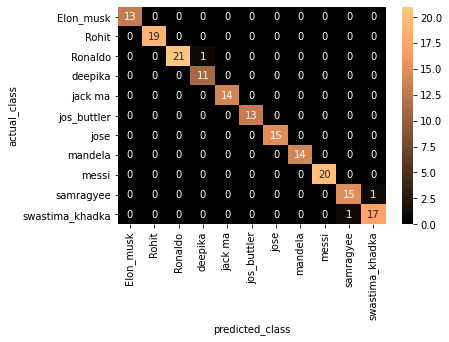

In [ ]:
sns.heatmap(confusion_matrix,cmap='copper',annot=True,fmt='d')
plt.show()

In [ ]:
model_json= model.to_json()
with open('/content/sample_data/saved_model.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
model.save_weights('/content/sample_data/saved_model.h5')

In [ ]:
model_json= model.to_json()
with open('/content/drive/My Drive/face_recognition/saved_model.json','w') as json_file:
  json_file.write(model_json)


  model.save_weights('/content/drive/My Drive/face_recognition/saved_model.h5')